# The effect of pets on psychological state during the pandemics

<b>Table of contents:</b>
1. [Data description](#description)
2. [Data inspection](#inspection)
    * [Data for Canada](#inspection_can)
    * [Data for Australia](#inspection_aus)
3. [Data analysis](#analysis)
    * [Canada data analysis](#analysis_can)
    * [Australia data analysis](#analysis_aus)
4. [Hypothesis testing](#hypothesis)
    * mental health of pet-owners is better than of those who don't have any pets
    * self-perceived mental health for Australians pet_owners differs from Canadians

## <a id='#description'>Data description</a>

* Results from survey completed by Canadian residents in Apr-Nov 2021.   
    Denis-Robichaud, Jose; Aenishaenslin, Cecile; Richard, Lucie; Desmarchelier, Marion; Carabin, Helene, 2021, "Association between Pet Ownership and Mental Health and Well-Being of Canadians Assessed in a Cross-Sectional Study during the COVID-19 Pandemic", https://doi.org/10.7910/DVN/JKDKWY, Harvard Dataverse, V5, UNF:6:7YJk+oBDFVpHnvlyBc1/Ew== [fileUNF]  
    The dataset includes the 23 variables used in the published manuscript.
    * D2: province or territory
    * region: Canadian geographical regions
    * O1: pet ownership
    * O8b: change in pet ownership
    * P1: pet attitude
    * D1: age
    * D5: highest level of education
    * D67: ethnicity
    * D4: gender
    * D11: number of people in the household
    * D8: yearly income
    * E3: change in income since the beginning of the pandemic
    * H2: disability
    * H1Ax: emotional, psychological or mental health condition
    * H4: change in mental health since the beginning of the pandemic
    * H56: tested positive to COVID-19 (or household member)
    * S: social support
    * QOL: quality of life (EQ-5D-5L score converted on the scale developed for Canada)
    * GH: self-assessed overall health
    * L1: loneliness
    * H3: perceived mental health
    * Q2: self-reported level of stress
    * Q1_cat: anxiety

*  Results from survey completed by majorly Australian residents in Jul2020-Aug 2021  
    Rohlf, Vanessa; Howell, Tiffani; Bennett, Pauleen (2021): Pandemic pets and people project. La Trobe. Dataset. https://doi.org/10.26181/60e7af7d87848 
    

## <a id='inspection'>Data inspection</a>

### <a id='inspection_can'>Data for Canada</a>

In [126]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import widgetbox, gridplot
from bokeh.models.widgets import Select
import panel as pn

from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

output_notebook()

Loading BokehJS ...

In [127]:
def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config
config = get_config()
db = config['db']

In [128]:
# Loading data from Canadian residents
try:
    data_can = pd.read_csv(db + 'dataset_petandcovid.csv', sep='\t', encoding='utf-8-sig')
except FileNotFoundError:
    print('No such file')

data_can.head()

,D2,region,O1,O8b,P1,D1,D5,D67,D4,D11,...,H1Ax,H4,H56,S,QOL,GH,L1,H3,Q2,Q1_cat
0,Nova Scotia,Atlantic,No,No,72,18-24,High school,Others,Men,4,...,No,Somewhat worse,No,No,0.829328,80,8,Good,A bit,Moderate
1,Alberta,Prairies,No,No,69,45-54,College,Caucasians,Men,4,...,No,Much worse,No,Yes,0.873691,80,5,Fair,A bit,Minimal
2,Newfoundland and Labrador,Atlantic,No,No,74,45-54,University,Caucasians,Men,2,...,Yes,Somewhat worse,No,Yes,0.437208,41,5,Fair,A bit,Mild
3,Ontario,Ontario,Yes,No,116,45-54,High school,Caucasians,Men,5,...,No,Somewhat worse,No,Yes,0.911329,80,6,Very good,Extremely,Moderate
4,Ontario,Ontario,Yes,No,99,18-24,University,Caucasians,Women,2,...,No,Somewhat better,No,Yes,0.860241,78,4,Very good,Not very,Minimal


In [129]:
# Renaming columns according to readme file
data_can.columns = ['province', 'region', 'pet_owner', 'change_in_ownership', 'pet_attitude', 'age', 'educ_level', 
                'ethnicity', 'gender', 'household_people', 'income', 'income_change', 'disability', 'mental_health', 
                'change_in_mh', 'tested_positive', 'social_support', 'quality_of_life', 'health_self', 'loneliness', 
                'mh_self', 'stress_self', 'anxiety']
data_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province             1500 non-null   object 
 1   region               1500 non-null   object 
 2   pet_owner            1500 non-null   object 
 3   change_in_ownership  1500 non-null   object 
 4   pet_attitude         1500 non-null   int64  
 5   age                  1500 non-null   object 
 6   educ_level           1500 non-null   object 
 7   ethnicity            1500 non-null   object 
 8   gender               1500 non-null   object 
 9   household_people     1500 non-null   int64  
 10  income               1500 non-null   object 
 11  income_change        1500 non-null   object 
 12  disability           1500 non-null   object 
 13  mental_health        1500 non-null   object 
 14  change_in_mh         1500 non-null   object 
 15  tested_positive      1500 non-null   o

In [130]:
data_can['province'].value_counts()

Ontario                      575
Qu�bec                       387
British Columbia             187
Alberta                      149
Saskatchewan                  49
Manitoba                      49
Nova Scotia                   37
New Brunswick                 36
Newfoundland and Labrador     18
Yukon                          6
Prince Edward Island           3
Northwest Territories          3
Nunavut                        1
Name: province, dtype: int64

In [131]:
#correcting the encoding problem
data_can['province'] = data_can['province'].str.replace('\uFFFD', 'e')
data_can['province'].value_counts()

Ontario                      575
Quebec                       387
British Columbia             187
Alberta                      149
Saskatchewan                  49
Manitoba                      49
Nova Scotia                   37
New Brunswick                 36
Newfoundland and Labrador     18
Yukon                          6
Prince Edward Island           3
Northwest Territories          3
Nunavut                        1
Name: province, dtype: int64

In [132]:
data_can['region'] = data_can['region'].str.replace('\uFFFD', 'e')
data_can['region'].value_counts()

Ontario             575
Quebec              387
Prairies            257
British Columbia    187
Atlantic             94
Name: region, dtype: int64

In [133]:
data_can['pet_owner'].value_counts()

No     750
Yes    750
Name: pet_owner, dtype: int64

In [134]:
data_can['change_in_ownership'].value_counts()

No      1259
Loss     173
New       68
Name: change_in_ownership, dtype: int64

In [135]:
# Excluding households which recently lost their pet to exclude effect on emotional state
data_can = data_can[data_can['change_in_ownership']!='Loss']
data_can.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province             1327 non-null   object 
 1   region               1327 non-null   object 
 2   pet_owner            1327 non-null   object 
 3   change_in_ownership  1327 non-null   object 
 4   pet_attitude         1327 non-null   int64  
 5   age                  1327 non-null   object 
 6   educ_level           1327 non-null   object 
 7   ethnicity            1327 non-null   object 
 8   gender               1327 non-null   object 
 9   household_people     1327 non-null   int64  
 10  income               1327 non-null   object 
 11  income_change        1327 non-null   object 
 12  disability           1327 non-null   object 
 13  mental_health        1327 non-null   object 
 14  change_in_mh         1327 non-null   object 
 15  tested_positive      1327 non-null   o

In [136]:
# Check for duplicates
print('Number of duplicates: {:.0f}'.format(data_can.duplicated().sum()))

Number of duplicates: 0


Data was loaded, checked for quality and duplicates, the values are of correct data types.  
From 1500 entries in intial dataframe, 1327 records were extracted for further analysis.

### <a id='inspection_aus'>Data for Australia</a>

In [137]:
# Loading data from Australian residents
try:
    data_aus = pd.read_csv(db + 'PandemicPetsAndPeopl.csv')
except FileNotFoundError:
    print('No such file')

data_aus.head()

,Record ID,Event Name,Survey Timestamp,Consent,Complete?,Survey Timestamp.1,1) What kind of pets do you have? Please check all options that apply to you (choice=Cat(s)),1) What kind of pets do you have? Please check all options that apply to you (choice=Dog(s)),1) What kind of pets do you have? Please check all options that apply to you (choice=Fish),1) What kind of pets do you have? Please check all options that apply to you (choice=Bird(s)),...,"9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Scratching post)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Play gym)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Television or radio left on)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Toys or puzzles)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Window to look out of)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Other)","9) In the last 7 days, during long periods when [pet_name] was at home with no access to humans (e.g., in a cat enclosure or run, owner at work), which of these, if any, did you use to provide [pet_name] with mental stimulation? (choice=Not applicable)",Please specify (Other).6,Complete?.9,Survey Timestamp.10
0,953dc94b029101f2edbd93b785afb1af,Event 1,16/07/2020 23:56,"I consent, begin the study",Complete,16/07/2020 23:58,Unchecked,Checked,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Incomplete,NaN
1,46d2363d6e8390960f9c96038636dda0,Event 1,17/07/2020 1:05,"I consent, begin the study",Complete,17/07/2020 1:16,Unchecked,Checked,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Incomplete,17/07/2020 1:45
2,c6552b19dcbab5fe9ced011d1b4fb82f,Event 1,17/07/2020 1:06,"I consent, begin the study",Complete,17/07/2020 1:08,Unchecked,Checked,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Incomplete,NaN
3,2b8eb8506347eb8d0929bffdb94a3350,Event 1,17/07/2020 1:07,"I consent, begin the study",Complete,17/07/2020 1:08,Unchecked,Checked,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Incomplete,17/07/2020 1:20
4,8ff3ed3e1dc09a658980653f08edafc8,Event 1,17/07/2020 1:07,"I consent, begin the study",Complete,17/07/2020 1:09,Checked,Checked,Unchecked,Unchecked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Incomplete,17/07/2020 1:30


In [138]:
print('Number of people that started the survey: {:.0f}'.format(len(data_aus)))

Number of people that started the survey: 1162


In [139]:
# Taking a look at the questions that people answered
for count, col in enumerate(data_aus.columns):
    print(count, col)

0 Record ID
1 Event Name
2 Survey Timestamp
3 Consent
4 Complete?
5 Survey Timestamp.1
6 1) What kind of pets do you have? Please check all options that apply to you (choice=Cat(s))
7 1) What kind of pets do you have? Please check all options that apply to you (choice=Dog(s))
8 1) What kind of pets do you have? Please check all options that apply to you (choice=Fish)
9 1) What kind of pets do you have? Please check all options that apply to you (choice=Bird(s))
10 1) What kind of pets do you have? Please check all options that apply to you (choice=Reptile(s))
11 1) What kind of pets do you have? Please check all options that apply to you (choice=Horse(s))
12 1) What kind of pets do you have? Please check all options that apply to you (choice=Rabbit(s))
13 1) What kind of pets do you have? Please check all options that apply to you (choice=Guinea pig(s))
14 1) What kind of pets do you have? Please check all options that apply to you (choice=Other)
15 1) What kind of pets do you have? Pl

In [140]:
# Leaving only several columns that can be used later for comparisson with Canadian residents and renaming them for convenience
data_aus = data_aus.iloc[:,[0, 2, 6, 7, 15, 25, 26, 27, 28, 56, 74, 132, 133, 135, 139]]
data_aus.columns = ['record_id', 'survey_time', 'has_cat', 'has_dog', 'no_pets', 'country', 'birth_year', 'gender', 'educ_level', 'tested_positive', 'loneliness', 'health_self', 'quality_of_life', 'mh_self', 'mh_prob_week']
data_aus.head()

,record_id,survey_time,has_cat,has_dog,no_pets,country,birth_year,gender,educ_level,tested_positive,loneliness,health_self,quality_of_life,mh_self,mh_prob_week
0,953dc94b029101f2edbd93b785afb1af,16/07/2020 23:56,Unchecked,Checked,Unchecked,Australia,1992.0,Female,"Postgraduate degree (Master's, PhD, or equival...",Unchecked,Really does not describe my experience <br> 1,NaN,NaN,NaN,NaN
1,46d2363d6e8390960f9c96038636dda0,17/07/2020 1:05,Unchecked,Checked,Unchecked,Australia,1999.0,Female,Year/Grade 11 or 12 (e.g. High school),Unchecked,4,Very good,Excellent,Very good,Often
2,c6552b19dcbab5fe9ced011d1b4fb82f,17/07/2020 1:06,Unchecked,Checked,Unchecked,Canada,1988.0,Male,"Postgraduate degree (Master's, PhD, or equival...",Checked,Really describes my experience <br> 5,NaN,NaN,NaN,NaN
3,2b8eb8506347eb8d0929bffdb94a3350,17/07/2020 1:07,Unchecked,Checked,Unchecked,Australia,1958.0,Male,Bachelor's degree,Unchecked,Really does not describe my experience <br> 1,Very good,Very good,Very good,Sometimes
4,8ff3ed3e1dc09a658980653f08edafc8,17/07/2020 1:07,Checked,Checked,Unchecked,Australia,1988.0,Female,Year/Grade 11 or 12 (e.g. High school),Unchecked,Really does not describe my experience <br> 1,Very good,Very good,Very good,Rarely


In [141]:
# Leaving in the table only residents from Australia
data_aus = data_aus[data_aus['country'] == 'Australia']
data_aus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 1161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        867 non-null    object 
 1   survey_time      867 non-null    object 
 2   has_cat          867 non-null    object 
 3   has_dog          867 non-null    object 
 4   no_pets          867 non-null    object 
 5   country          867 non-null    object 
 6   birth_year       860 non-null    float64
 7   gender           856 non-null    object 
 8   educ_level       867 non-null    object 
 9   tested_positive  867 non-null    object 
 10  loneliness       815 non-null    object 
 11  health_self      761 non-null    object 
 12  quality_of_life  758 non-null    object 
 13  mh_self          761 non-null    object 
 14  mh_prob_week     761 non-null    object 
dtypes: float64(1), object(14)
memory usage: 108.4+ KB


In [142]:
# Check for duplicates
print('Number of duplicates: {:.0f}'.format(data_aus.duplicated().sum()))

Number of duplicates: 0


In [143]:
data_aus['no_pets'].value_counts()

Unchecked    867
Name: no_pets, dtype: int64

It seems like the dataset has information only on pet-owners.

In [144]:
# excluding households with pets other than cats or dogs
data_aus = data_aus[~((data_aus['has_cat'] == 'Unchecked')&(data_aus['has_dog'] == 'Unchecked')&(data_aus['no_pets'] == 'Unchecked'))]
data_aus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 1161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        836 non-null    object 
 1   survey_time      836 non-null    object 
 2   has_cat          836 non-null    object 
 3   has_dog          836 non-null    object 
 4   no_pets          836 non-null    object 
 5   country          836 non-null    object 
 6   birth_year       831 non-null    float64
 7   gender           825 non-null    object 
 8   educ_level       836 non-null    object 
 9   tested_positive  836 non-null    object 
 10  loneliness       788 non-null    object 
 11  health_self      740 non-null    object 
 12  quality_of_life  737 non-null    object 
 13  mh_self          740 non-null    object 
 14  mh_prob_week     740 non-null    object 
dtypes: float64(1), object(14)
memory usage: 104.5+ KB


Dealing with empty values:

In [145]:
# For birth_year the option can be is to categorize people by age the same way it was done for Canadian data, 
# and 5 empty values can be left as 'not mentioned'
def age_category(row):
    if np.isnan(row['birth_year']):
        return('not mentioned')
    else:
        age = 2020 - row['birth_year']
        if age < 18:
            return '18-'
        if (age >= 18) and (age < 25):
            return '18-24'
        if (age >= 25) and (age < 35):
            return '25-34'
        if (age >= 35) and (age < 45):
            return '35-44'
        if (age >= 45) and (age < 55):
            return '45-54'
        if (age >= 55) and (age < 65):
            return '55-64'
        if age >= 65:
            return '65+'

data_aus['age'] = data_aus.apply(age_category, axis=1)
data_aus.drop('birth_year', axis=1, inplace=True)
data_aus.sample(5)

,record_id,survey_time,has_cat,has_dog,no_pets,country,gender,educ_level,tested_positive,loneliness,health_self,quality_of_life,mh_self,mh_prob_week,age
540,2c99b9af3fe1cf0089ae63e83dd4f744,31/07/2020 22:41,Checked,Checked,Unchecked,Australia,Female,Bachelor's degree,Unchecked,4,Good,Very good,Very good,Often,18-24
364,9984192ddf4181e829db005b5ed9a1ed,30/07/2020 11:33,Unchecked,Checked,Unchecked,Australia,Female,"Postgraduate degree (Master's, PhD, or equival...",Unchecked,Really does not describe my experience <br> 1,Fair,Good,Very good,Sometimes,45-54
189,f857037c442829ec16287412aca3337f,21/07/2020 22:50,Checked,Checked,Unchecked,Australia,Female,Bachelor's degree,Unchecked,2,Excellent,Excellent,Very good,Often,35-44
501,3d73f87ae29b98ee2d1fedf04b615f48,31/07/2020 13:44,Checked,Unchecked,Unchecked,Australia,Male,"Associate degree, TAFE diploma, trade certific...",Unchecked,2,Very good,Very good,Excellent,Never,35-44
510,34717d0081c04f259c4abb9db85604a5,31/07/2020 14:48,Unchecked,Checked,Unchecked,Australia,Female,"Associate degree, TAFE diploma, trade certific...",Unchecked,3,Very good,Very good,Excellent,Often,55-64


In [146]:
# substituting empty values in gender column with 'not mentioned'
data_aus.loc[data_aus['gender'].isna(), 'gender'] = 'Other or did not answer'

In [147]:
# loneliness
data_aus['loneliness'].value_counts()

Really does not describe my experience <br> 1    221
3                                                178
2                                                156
4                                                138
Really describes my experience <br> 5             95
Name: loneliness, dtype: int64

In [148]:
# Since the minimum score is 1, empty values can be substituted with zeros
data_aus.loc[data_aus['loneliness']=='Really does not describe my experience <br> 1', 'loneliness'] = 1
data_aus.loc[data_aus['loneliness']=='Really describes my experience <br> 5', 'loneliness'] = 5
data_aus.loc[data_aus['loneliness'].isna(), 'loneliness'] = 0
data_aus['loneliness'] = data_aus['loneliness'].astype('int')
data_aus['loneliness'].value_counts()

1    221
3    178
2    156
4    138
5     95
0     48
Name: loneliness, dtype: int64

In [149]:
data_aus.loc[data_aus['health_self'].isna(), 'health_self'] = 'unknown'
data_aus['health_self'].value_counts()

Very good    291
Good         251
Excellent     97
unknown       96
Fair          83
Poor          18
Name: health_self, dtype: int64

In [150]:
data_aus.loc[data_aus['quality_of_life'].isna(), 'quality_of_life'] = 'unknown'
data_aus.loc[data_aus['mh_self'].isna(), 'mh_self'] = 'unknown'
data_aus.loc[data_aus['mh_prob_week'].isna(), 'mh_prob_week'] = 'unknown'

data_aus['mh_prob_week'].value_counts()

Sometimes    267
Often        215
Rarely       142
unknown       96
Always        69
Never         47
Name: mh_prob_week, dtype: int64

In [151]:
# changing the type for survey timestamp
data_aus['survey_time'] = pd.to_datetime(data_aus['survey_time'], format='%d/%m/%Y %H:%M')
print(data_aus['survey_time'].min(), ' - ', data_aus['survey_time'].max())

2020-07-16 23:56:00  -  2021-06-15 13:17:00


In [152]:
data_aus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 1161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_id        836 non-null    object        
 1   survey_time      836 non-null    datetime64[ns]
 2   has_cat          836 non-null    object        
 3   has_dog          836 non-null    object        
 4   no_pets          836 non-null    object        
 5   country          836 non-null    object        
 6   gender           836 non-null    object        
 7   educ_level       836 non-null    object        
 8   tested_positive  836 non-null    object        
 9   loneliness       836 non-null    int64         
 10  health_self      836 non-null    object        
 11  quality_of_life  836 non-null    object        
 12  mh_self          836 non-null    object        
 13  mh_prob_week     836 non-null    object        
 14  age              836 non-null    object  

Data from Australians was converted to dataframe that would be easier to compare with Canadians. Column headers renamed for convenient use, data type corrected, checked for duplicates, n/a values were left in the dataframe but substituted with 'not mentioned'.  
Data available for period 16/Jul/2020 - 15/Jun/2021.  
From initial dataframe with 1162 entries, 836 entries were extracted by applying filters. 

## <a id='analysis'>Data analysis</a>

### <a id='analysis_can'>Canada data analysis</a>

In [153]:
#pet-owners on the map
from folium import Map, Marker
from folium.plugins import MarkerCluster

canada_lat, canada_lng = 56.1304, -106.3468

m = Map(location=[canada_lat, canada_lng], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):       
    if row['province'] == 'Ontario':
        lat = 51.2538
        lng = -85.3232
    if row['province'] == 'Quebec':
        lat = 46.829853
        lng = -71.254028
    if row['province'] == 'British Columbia':
        lat = 53.7267
        lng = -127.6476
    if row['province'] == 'Alberta':
        lat = 53.9333
        lng = -116.5765
    if row['province'] == 'Saskatchewan':
        lat = 55.000000
        lng = -106.000000
    if row['province'] == 'Manitoba':
        lat = 56.415211
        lng = -98.739075
    if row['province'] == 'Nova Scotia':
        lat = 45.000000
        lng = -63.000000
    if row['province'] == 'New Brunswick':
        lat = 46.498390
        lng = -66.159668
    if row['province'] == 'Newfoundland and Labrador':
        lat = 53.135509
        lng = -57.660435
    if row['province'] == 'Yukon':
        lat = 64.000000
        lng = -135.000000
    if row['province'] == 'Prince Edward Island':
        lat = 46.250000
        lng = -63.000000
    if row['province'] == 'Northwest Territories':
        lat = 63.588753
        lng = -115.506938
    if row['province'] == 'Nunavut':
        lat = 70.453262
        lng = -86.798981
    Marker(
        [lat, lng],
    ).add_to(marker_cluster)

data_can[data_can['pet_owner']=='Yes'].apply(create_clusters, axis=1)

m

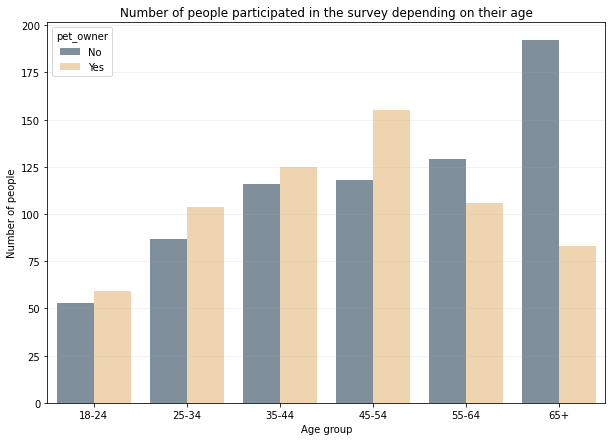

In [154]:
# Distribution of people by age
grouped = data_can.groupby(['age', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='age', y = 'province', data=grouped, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on their age')
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

Amount of people who are pet-owners prevails for age groups under 55 years. After 55 years there are more households without any pets, especially after age 65: amount of non pet-owners is almost double than of those with pet. The majority of pet-owners are aged 45-55.

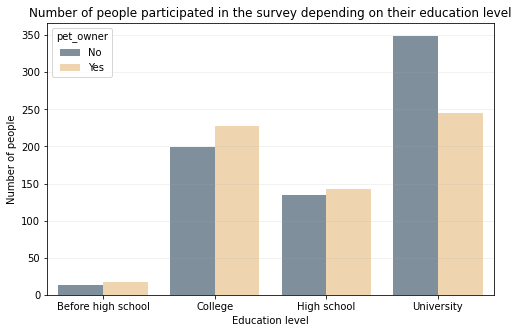

In [155]:
# Distribution of people by education level
grouped_ed = data_can.groupby(['educ_level', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='educ_level', y = 'province', data=grouped_ed, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on their education level')
plt.xlabel('Education level')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

Number of people without any pet prevails only for people with university degree.

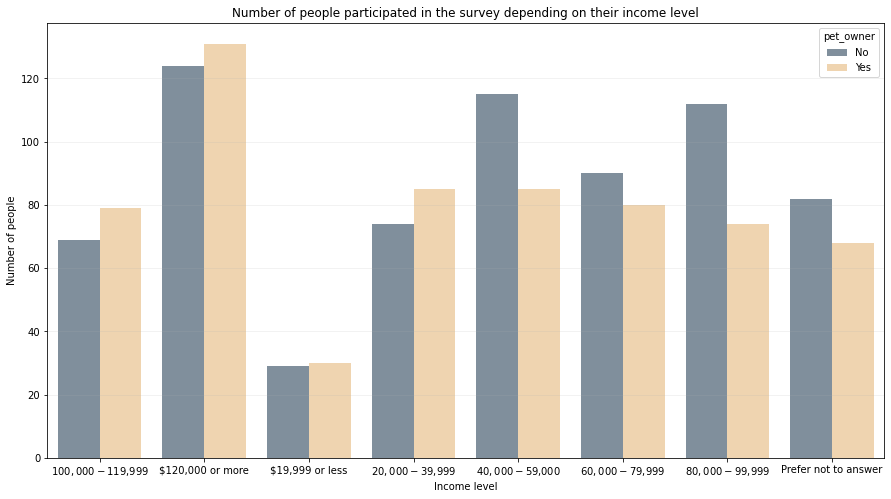

In [156]:
# Distribution of people by income level
grouped_inc = data_can.groupby(['income', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='income', y = 'province', data=grouped_inc, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on their income level')
plt.xlabel('Income level')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

Number of pet-owners is more among people either with low-income (<40k) or high-income (>100k). However, amount of households without pets is more among middle class (between 40k and 100k). 

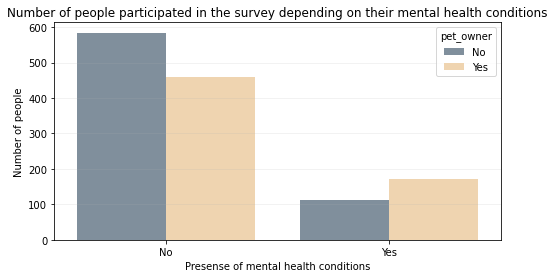

In [157]:
# Distribution of people by presense of mental health conditions
grouped_mh = data_can.groupby(['mental_health', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='mental_health', y = 'province', data=grouped_mh, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on their mental health conditions')
plt.xlabel('Presense of mental health conditions')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

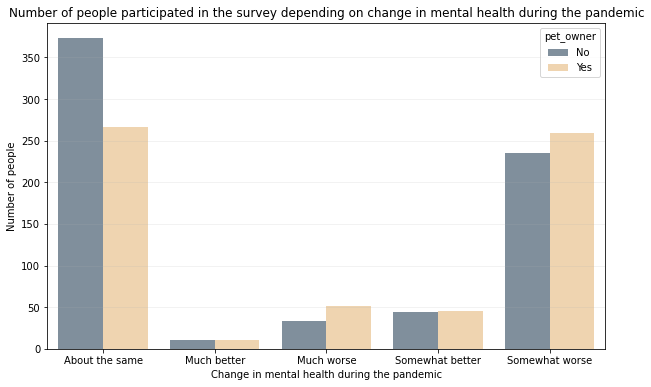

In [158]:
# Distribution of people by presense of mental health conditions
grouped_mh = data_can.groupby(['change_in_mh', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='change_in_mh', y = 'province', data=grouped_mh, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on change in mental health during the pandemic')
plt.xlabel('Change in mental health during the pandemic')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

The amount of people who felt worse during the pandemic is more for pet-owners.

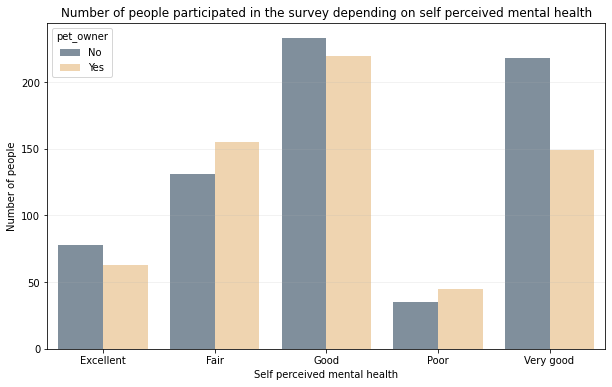

In [159]:
# Distribution of people by presense of mental health conditions
grouped_mh = data_can.groupby(['mh_self', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='mh_self', y = 'province', data=grouped_mh, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on self perceived mental health')
plt.xlabel('Self perceived mental health')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

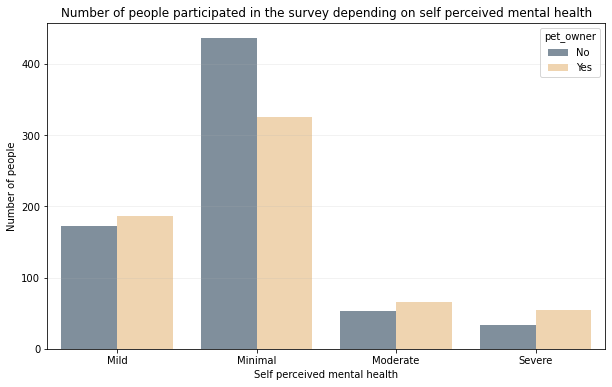

In [160]:
# Distribution of people by presense of mental health conditions
grouped_mh = data_can.groupby(['anxiety', 'pet_owner'])['province'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='anxiety', y = 'province', data=grouped_mh, hue='pet_owner', palette=['#7B8FA1', '#FAD6A5'])
plt.title('Number of people participated in the survey depending on self perceived mental health')
plt.xlabel('Self perceived mental health')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

Variable 'pet_owner' along with the 'mental_health', 'change_in_mh' and 'loneliness' are independent variables, so we cannot calculate correlation coefficient for them.

### <a id='analysis_aus'>Australia data analysis</a>

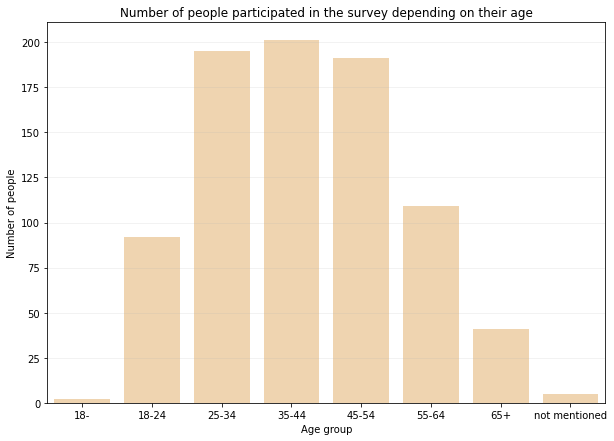

In [161]:
# Distribution of people by age
grouped = data_aus.groupby(['age'])['record_id'].count().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='age', y = 'record_id', data=grouped, palette=['#FAD6A5'])
plt.title('Number of people participated in the survey depending on their age')
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

Among Australians the majority of pet-owners are aged 25-55 (for Canadians it was 45-55).

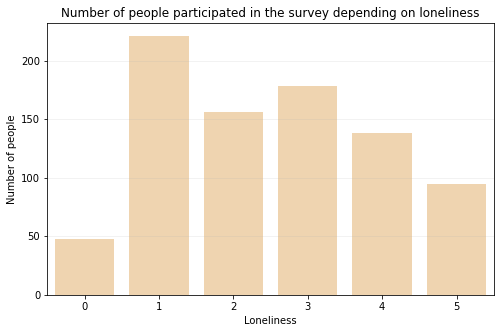

In [162]:
# Distribution of people by loneliness
grouped_ed = data_aus.groupby(['loneliness'])['record_id'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='loneliness', y = 'record_id', data=grouped_ed, palette=['#FAD6A5'])
plt.title('Number of people participated in the survey depending on loneliness')
plt.xlabel('Loneliness')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

The majority of Australian pet-owners didn't feel lonely during pandemic (score = '1'), but still that feeling wasn't uncommon among these people.

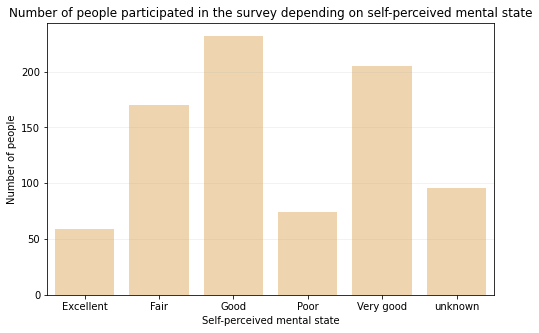

In [163]:
# Distribution of people by loneliness
grouped_ed = data_aus.groupby(['mh_self'])['record_id'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='mh_self', y = 'record_id', data=grouped_ed, palette=['#FAD6A5'])
plt.title('Number of people participated in the survey depending on self-perceived mental state')
plt.xlabel('Self-perceived mental state')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.2)
plt.show()

The majority of Australian pet-owners evaluate their mental state as 'Good' and 'Very good'. Which is almost the same for Canadian (where tha majority said that they had 'minimal' impact on their mental state).

## <a id='hypothesis'>Hypothesis testing</a>

<b>Change in mental health state for Canadian pet-owners differs from those who don't have any pets</b>

In [164]:
pet_owners = data_can[data_can['pet_owner']=='Yes']
pet_owners['change_in_mh'] = pet_owners['change_in_mh'].map({'Much worse': -2, 'Somewhat worse': -1, 
                                                             'About the same': 0, 'Somewhat better': 1, 'Much better': 2})
not_pet_owners = data_can[data_can['pet_owner']=='No']
not_pet_owners['change_in_mh'] = not_pet_owners['change_in_mh'].map({'Much worse': -2, 'Somewhat worse': -1, 
                                                             'About the same': 0, 'Somewhat better': 1, 'Much better': 2})


p-value:  3.083970614060489e-23
Distibution is not normal


<AxesSubplot:xlabel='change_in_mh', ylabel='Density'>

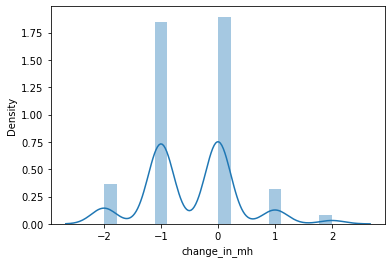

In [165]:
#Check for normal distribution: pet_owners
results = st.shapiro(pet_owners['change_in_mh'])
p_value = results[1]
alpha = 0.05
print('p-value: ', p_value)

if p_value < alpha:
    print('Distibution is not normal')
else:
    print('Distribution is normal')
    
sns.distplot(pet_owners['change_in_mh'])

p-value:  8.588849446598118e-27
Distibution is not normal


<AxesSubplot:xlabel='change_in_mh', ylabel='Density'>

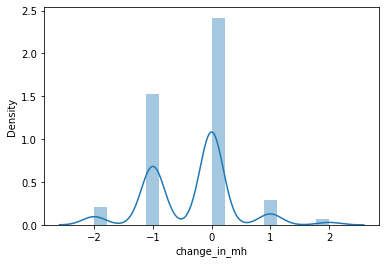

In [166]:
#Check for normal distribution: not_pet_owners
results = st.shapiro(not_pet_owners['change_in_mh'])
p_value = results[1]
alpha = 0.05
print('p-value: ', p_value)

if p_value < alpha:
    print('Distibution is not normal')
else:
    print('Distribution is normal')
    
sns.distplot(not_pet_owners['change_in_mh'])

Both distribution aren't normal based on the Shapio-Wilk test, we'll use Mann-Whitney non-parametric test to test the hypothesis:

In [167]:
# H0: Change in mental health state for Canadian pet-owners is the same as for those who don't have any pets
# H1: Change in mental health state for Canadian pet-owners differs from those who don't have any pets

results = st.mannwhitneyu(pet_owners['change_in_mh'], not_pet_owners['change_in_mh'])

print('p-value: {:.2f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Rejecting null hypothesis, there is a statistically significant difference')
else:
    print('Null hypothesis cannot be rejected')

p-value: 0.00
Rejecting null hypothesis, there is a statistically significant difference


<b>Self-perceived mental health for Australians pet-owners differs from Canadians</b>

In [168]:
pet_owners_can = data_can[data_can['pet_owner']=='Yes']
pet_owners_can['mh_self'] = pet_owners_can['mh_self'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 
                                                           'Very good': 3, 'Excellent': 4})
pet_owners_aus = data_aus[data_aus['mh_self'] != 'unknown']
pet_owners_aus['mh_self'] = pet_owners_aus['mh_self'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 
                                                           'Very good': 3, 'Excellent': 4})

p-value: 0.00
Distibution is not normal


<AxesSubplot:xlabel='mh_self', ylabel='Density'>

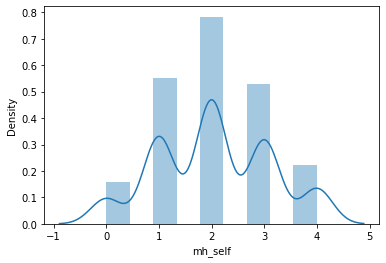

In [169]:
#Check for normal distribution: canadian pet_owners
results = st.shapiro(pet_owners_can['mh_self'])
p_value = results[1]
alpha = 0.05
print('p-value: {:.2f}'.format(p_value))

if p_value < alpha:
    print('Distibution is not normal')
else:
    print('Distribution is normal')
    
sns.distplot(pet_owners_can['mh_self'])

p-value: 0.00
Distibution is not normal


<AxesSubplot:xlabel='mh_self', ylabel='Density'>

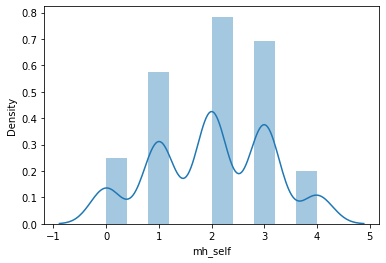

In [170]:
#Check for normal distribution: australian pet_owners
results = st.shapiro(pet_owners_aus['mh_self'])
p_value = results[1]
alpha = 0.05
print('p-value: {:.2f}'.format(p_value))

if p_value < alpha:
    print('Distibution is not normal')
else:
    print('Distribution is normal')
    
sns.distplot(pet_owners_aus['mh_self'])

Both distribution aren't normal based on the Shapio-Wilk test, we'll use Mann-Whitney non-parametric test to test the hypothesis:

In [171]:
# H0: Self-perceived mental health for Australian pet-owners and Canadian is the same
# H1: Self-perceived mental health for Australian pet-owners differs from Canadian

results = st.mannwhitneyu(pet_owners_aus['mh_self'], pet_owners_can['mh_self'])

print('p-value: {:.2f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Rejecting null hypothesis, there is a statistically significant difference')
else:
    print('Null hypothesis cannot be rejected')

p-value: 0.71
Null hypothesis cannot be rejected


<b>Conclusion</b>  
The data from Canadian and Australian residents was analysed. However, only for Canadians it was possible to compare the effect of pets, due to the reason that in Australia only pet-owners completed the survey. Suprisingly, the amount of people who felt worse during the pandemic is more among pet-owners, but we cannot be sure that there is a direct correlation as there can be another factors affecting (for example people could had been already diagnosed with some mental health diseases, which got worsened by self isolation).  
Conducting statistical testing of the hypothesis we can say that there is no statistical difference between self-assessed mental state of pet-owners in Australia and in Canada.  
For more clear results there should be more data and different factors should be taken into account.

In [172]:
from bokeh.models import ColumnDataSource, FactorRange #range of values for a categorical dimension
from bokeh.transform import factor_cmap

def plot_bar_chart(filter_opt = 'age'):
    subset = data_can.groupby([filter_opt, 'pet_owner'])['province'].count().reset_index()
    pivot = subset.pivot(index=filter_opt, columns='pet_owner', values='province').reset_index()
    
    pet = ['No', 'Yes']
    x = [(f, cond) for f in pivot[filter_opt] for cond in pet]
    counts = sum(zip(pivot['No'].tolist(), pivot['Yes'].tolist()), ())
    source = ColumnDataSource(data=dict(x=x, counts=counts))

    palette = ['#7B8FA1', '#FAD6A5']
    p = figure(x_range = FactorRange(*x),
               height = 500, 
               width = 600,
               title = f'Number of people participated in the survey depending on {filter_opt}')

    p.vbar(x='x', top='counts', width=1, source=source, line_color="white",
          fill_color=factor_cmap('x', palette=palette, factors=pet, start=1, end=2))
    p.xaxis.axis_label = f'{filter_opt}'
    p.yaxis.axis_label='Number of people'
    
    #disable grid
    p.xgrid.grid_line_color = None

    return p

In [173]:
#Select widget
filter_select = Select(title = "Filter by", value='age', options = ['age', 'educ_level',
                                                      'gender', 'income', 'mental_health',
                                                      'change_in_mh', 'loneliness', 'anxiety'])


In [174]:
pn.extension()
ip = pn.interact(plot_bar_chart, filter_opt = filter_select.value)

In [ ]:
dashboard = pn.template.BootstrapTemplate(title='Effect of pets on Canadian residents during COVID-19', sidebar_width=300)
dashboard.sidebar.append(widgetbox(filter_select))
dashboard.main.append(pn.Row(ip[1]))
dashboard.show()